# How to Detect Random Walk and White Noise in Time Series Forecasting
## and how to deal with them if you find one   ## TODO
![](images/pexels.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@pripicart?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Tobi</a>
        on 
        <a href='https://www.pexels.com/photo/person-stands-on-brown-pathway-631986/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

## Setup

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
tps_july = pd.read_csv(
    "https://raw.githubusercontent.com/BexTuychiev/medium_stories/master/2021/july/4_advanced_ts_visuals/data/tps_july_train.csv",
    parse_dates=["date_time"],
    index_col="date_time",
)

## Introduction

No matter how powerful, machine learning *cannot* predict everything. A well-known area where it can become pretty helpless is related to time series forecasting.

Despite the availability of a large suite of autoregressive models and many other algorithms for time series, you cannot predict the target distribution if it is **white noise** or follows a **random walk**. 

So, it is essential you detect such distributions before you make further efforts. 

In this article, you will learn what white noise and random walk are and explore proven statistical techniques to detect them.

## Before we start...

This is my third article on time series forecasting series (you check out the whole series from this [list](https://ibexorigin.medium.com/list/time-series-forecast-from-scratch-c72ccf7a9229), it is a new Medium feature).

While the first one was about every single Pandas function to manipulate TS data, the second one was about time series decomposition and autocorrelation. 

To get the most out of this post, you need to at least understand what autocorrelation is. Here, I will give a brief explanation but if you want to go deeper, check out my last article.

## Brief notes on Autocorrelation

Autocorrelation involves finding the correlation between a time series and a lagged version of itself. Consider this distribution:

In [3]:
deg_C = tps_july["deg_C"].to_frame("temperature")

deg_C.head()

,temperature
date_time,
2010-03-10 18:00:00,13.1
2010-03-10 19:00:00,13.2
2010-03-10 20:00:00,12.6
2010-03-10 21:00:00,11.0
2010-03-10 22:00:00,11.9


Lagging a time series means shifting it 1 or more periods backward:

In [4]:
deg_C["lag_1"] = deg_C["temperature"].shift(periods=1)
deg_C["lag_2"] = deg_C["temperature"].shift(periods=2)
deg_C["lag_3"] = deg_C["temperature"].shift(periods=3)

deg_C.head(6)

,temperature,lag_1,lag_2,lag_3
date_time,,,,
2010-03-10 18:00:00,13.1,NaN,NaN,NaN
2010-03-10 19:00:00,13.2,13.1,NaN,NaN
2010-03-10 20:00:00,12.6,13.2,13.1,NaN
2010-03-10 21:00:00,11.0,12.6,13.2,13.1
2010-03-10 22:00:00,11.9,11.0,12.6,13.2
2010-03-10 23:00:00,11.2,11.9,11.0,12.6


The Autocorrelation Function (ACF) finds the correlation coefficient between a time series and its lagged version at each lag *k*. You can plot it using the `plot_acf` function from `statsmodels`. Here is what it looks like:

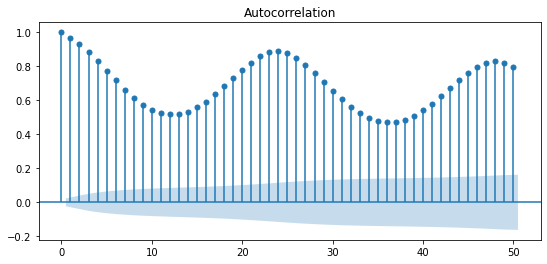

In [7]:
from matplotlib import rcParams
from statsmodels.graphics.tsaplots import plot_acf

rcParams["figure.figsize"] = 9, 4
# ACF function up to 50 lags
fig = plot_acf(deg_C["temperature"], lags=50)

plt.show();

The XAxis is the lag *k* and the YAxis is the Pearson's correlation coefficient at each lag. The blue shaded region is a confidence interval. If the height of the bars are outside this region, it means the correlation is statistically significant.